In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
data = pd.read_csv("C:/Users/mncub/Downloads/car_price_dataset.csv")

In [21]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [22]:
data.tail()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084
9999,Volkswagen,Tiguan,2001,2.1,Diesel,Manual,157882,3,3,3342


In [23]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [24]:
data.shape

(10000, 10)

In [25]:
data.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [26]:
data.nunique()

Brand             10
Model             30
Year              24
Engine_Size       41
Fuel_Type          4
Transmission       3
Mileage         9854
Doors              4
Owner_Count        5
Price           6661
dtype: int64

In [27]:
data['Brand'].unique()

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [28]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [50]:
data["Price_per_mile"] = data["Price"] / data["Mileage"]

In [51]:
data.dropna(inplace=True)

In [52]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

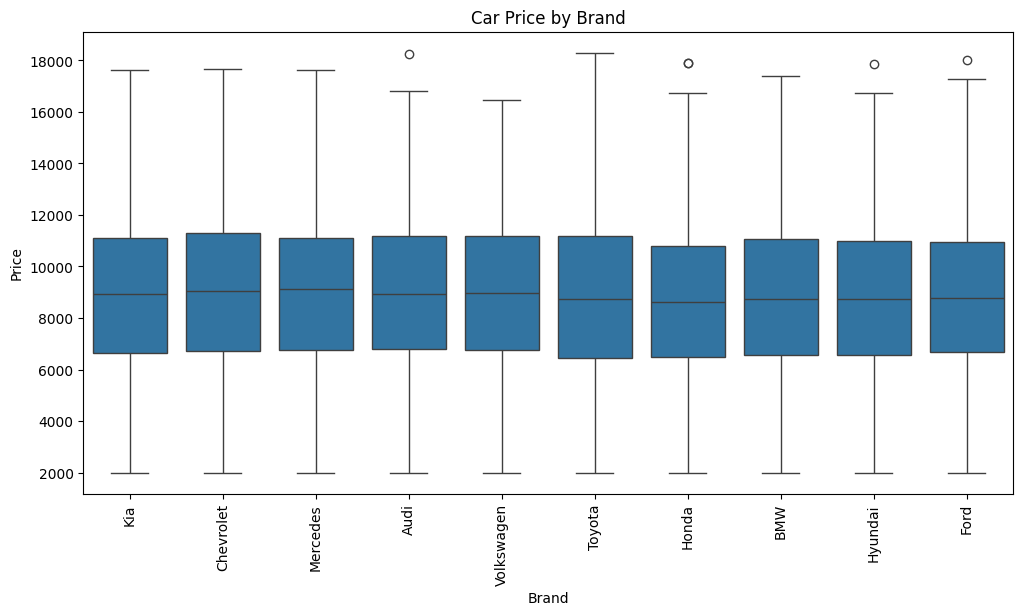

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Brand"], y=data["Price"])
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Car Price by Brand")
plt.show()

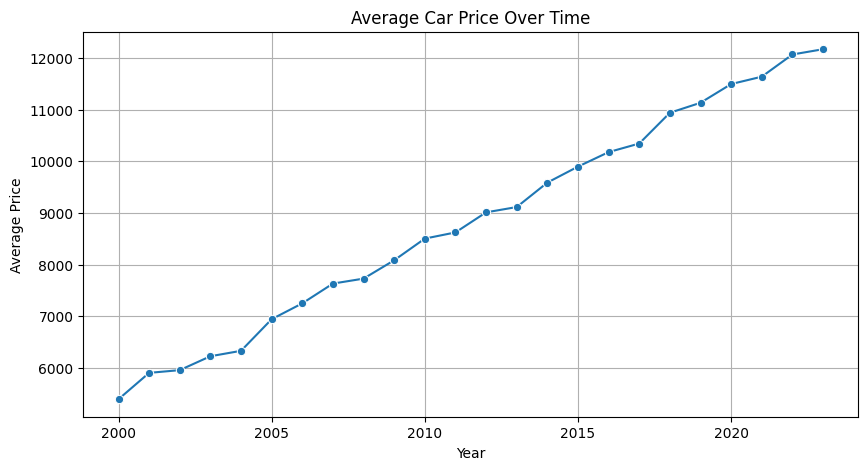

In [55]:
if "Year" in data.columns:
    data_yearly = data.groupby("Year")["Price"].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=data_yearly["Year"], y=data_yearly["Price"], marker="o")
    plt.title("Average Car Price Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Price")
    plt.grid()
    plt.show()
else:
    print("\n'Year' column not found in the dataset.")

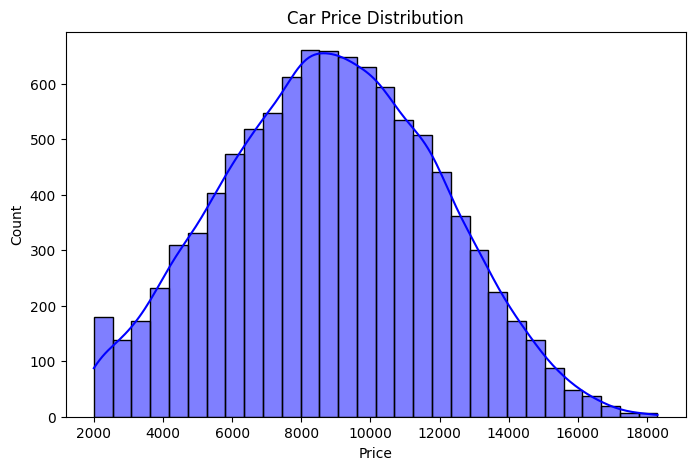

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Price"], bins=30, kde=True, color="blue")
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [39]:
data.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

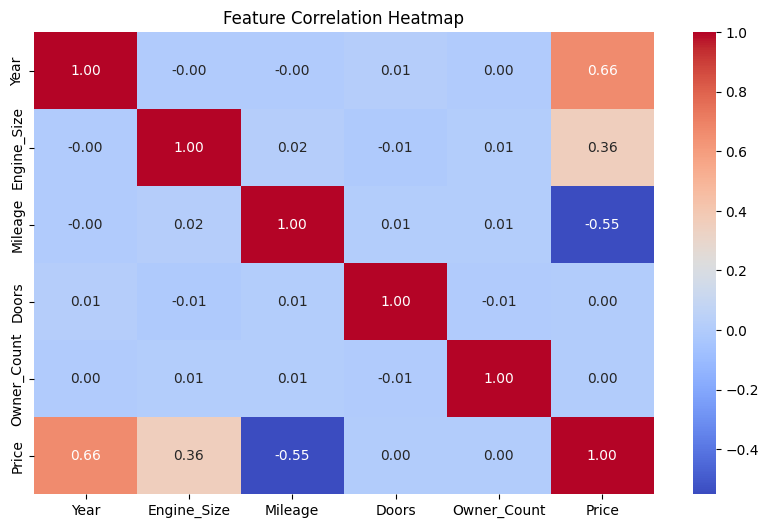

In [44]:
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=["number"])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

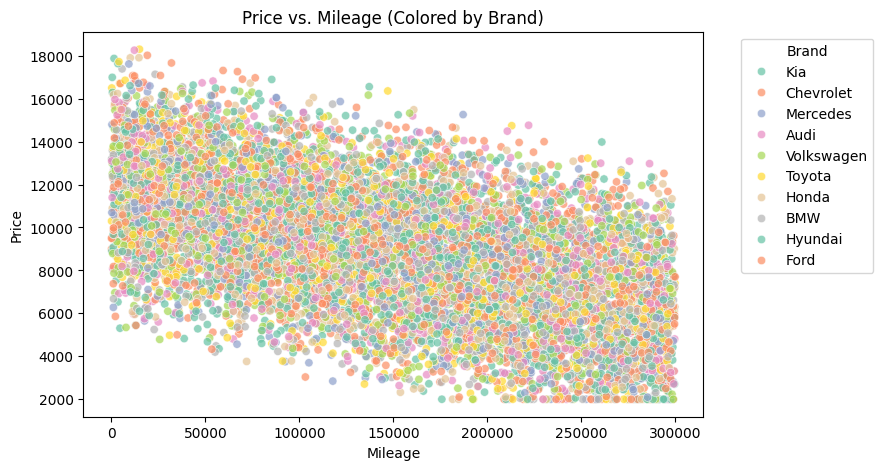

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Mileage"], y=data["Price"], hue=data["Brand"], palette="Set2", alpha=0.7)
plt.title("Price vs. Mileage (Colored by Brand)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

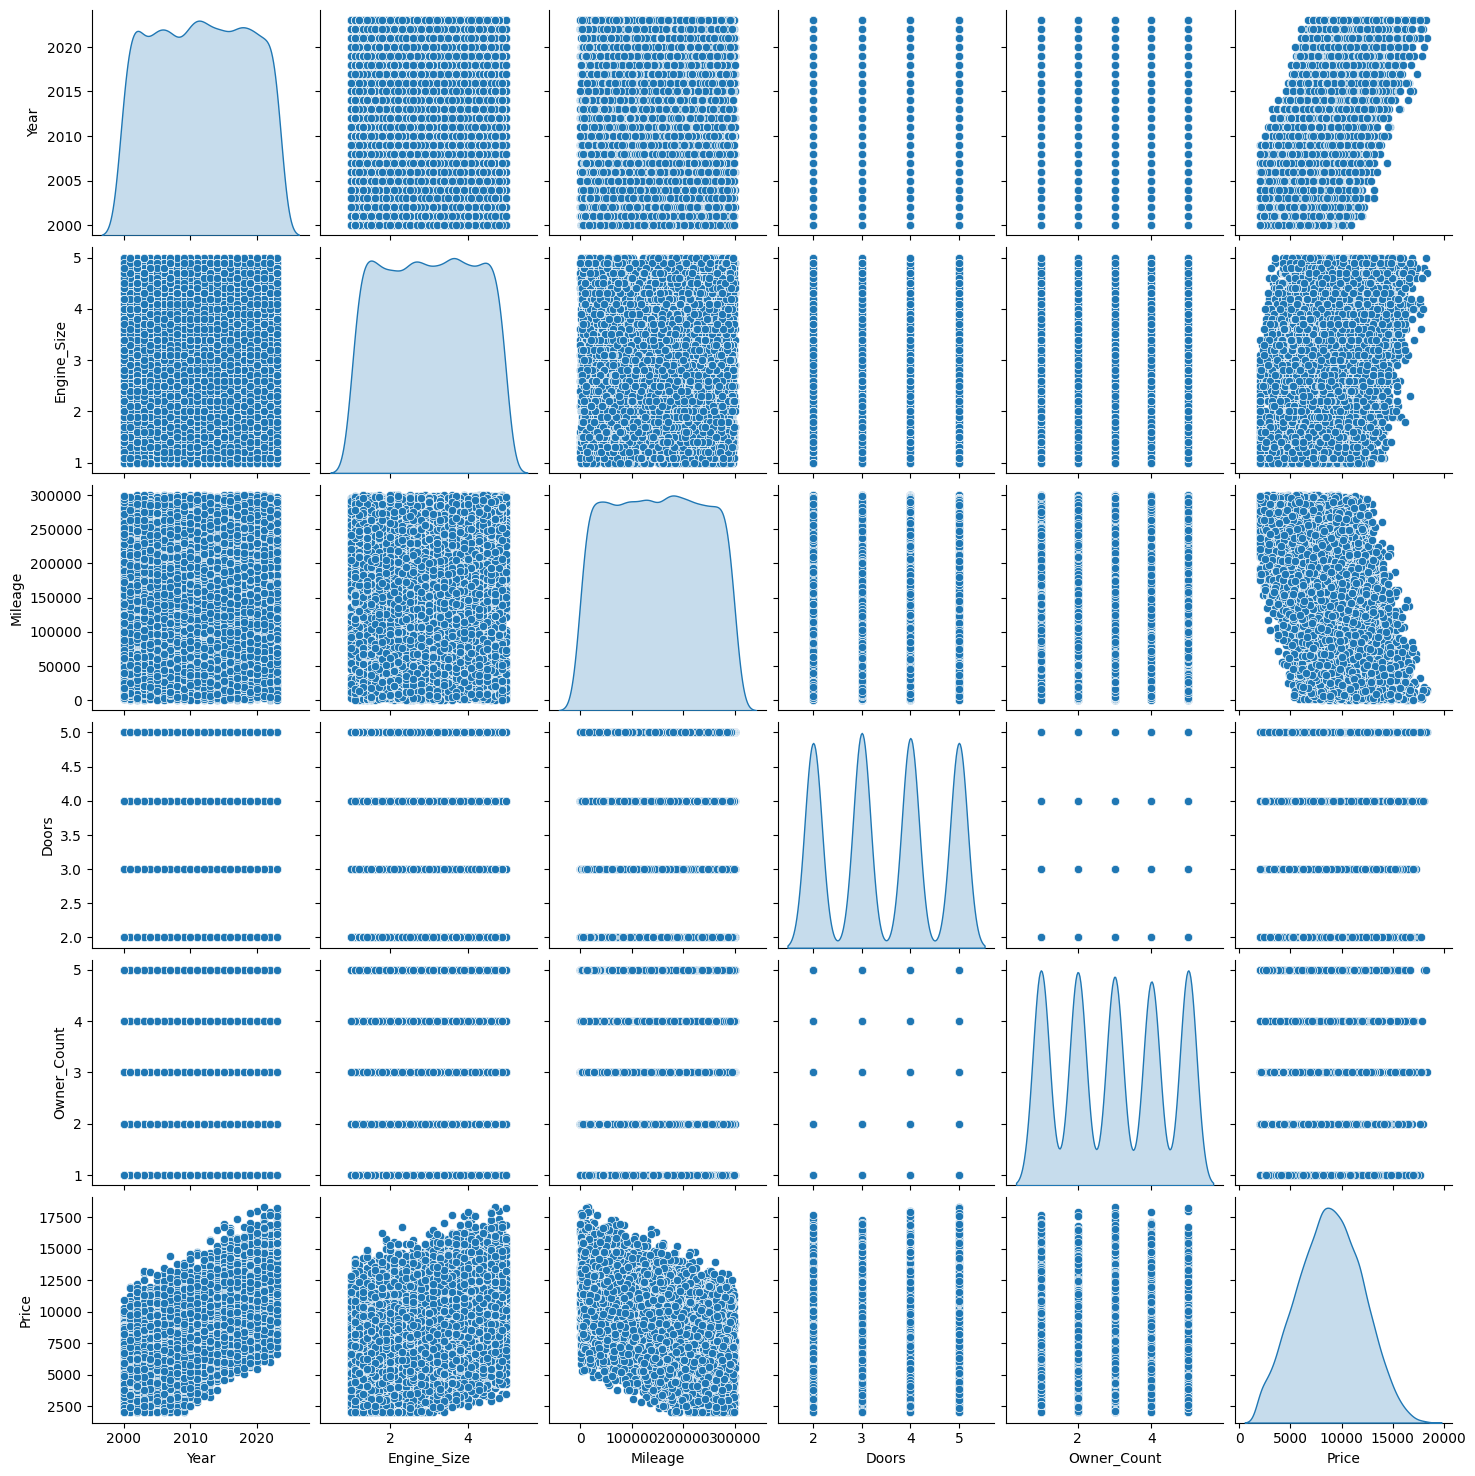

In [49]:
sns.pairplot(data, diag_kind="kde")
plt.show()